In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nlp
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [3]:
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_true.head()
## The String "()" still remains in the text column to be removed which i take care of during the NLP part done below

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON () - The head of a conservative Rep...  politicsNews   
1  WASHINGTON () - Transgender people will be all...  politicsNews   
2  WASHINGTON () - The special counsel investigat...  politicsNews   
3  WASHINGTON () - Trump campaign adviser George ...  politicsNews   
4  SEATTLE/WASHINGTON () - President Donald Trump...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
df_fake["target"] = 0
df_true["target"] = 1

In [5]:
df_true.head(10)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON () - The head of a conservative Rep...  politicsNews   
1  WASHINGTON () - Transgender people will be all...  politicsNews   
2  WASHINGTON () - The special counsel investigat...  politicsNews   
3  WASHINGTON () - Trump campaign adviser George ...  politicsNews   
4  SEATTLE/WASHINGTON () - President Donald Trump...  politicsNews   
5  WEST PALM BEACH, Fla./WASHINGTON () - The Whit...  politicsNews   
6  WEST PALM BEACH, Fla () - President Donald Tru...  politicsNews   
7  The following statements were posted to the ve...  politicsNews   
8  The following statements were posted to the ve...  politicsNews   
9  WASHINGTON () - Alabama Secretary of State Joh...  politicsNews   

                 date  target  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1  
5  December 29, 2017        1  
6  December 29, 2017        1  
7  December 29, 2017        1  
8  December 29, 2017        1  
9  December 28, 2017        1

In [6]:
df_fake.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  target  
0  December 31, 2017       0  
1  December 31, 2017       0  
2  December 30, 2017       0  
3  December 29, 2017       0  
4  December 25, 2017       0  
5  December 25, 2017       0  
6  December 23, 2017       0  
7  December 23, 2017       0  
8  December 22, 2017       0  
9  December 21, 2017       0

In [7]:
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)

In [8]:
df = pd.concat([df_fake,df_true],axis = 0)

In [9]:
df.head(10)

text  target
0  Donald Trump just couldn t wish all Americans ...       0
1  House Intelligence Committee Chairman Devin Nu...       0
2  On Friday, it was revealed that former Milwauk...       0
3  On Christmas day, Donald Trump announced that ...       0
4  Pope Francis used his annual Christmas Day mes...       0
5  The number of cases of cops brutalizing and ki...       0
6  Donald Trump spent a good portion of his day a...       0
7  In the wake of yet another court decision that...       0
8  Many people have raised the alarm regarding th...       0
9  Just when you might have thought we d get a br...       0

In [10]:
df = df.sample(frac=1)
df.head(10)

text  target
23061  Join Patrick every Wednesday at Independent Ta...       0
11695        https://www.youtube.com/watch?v=VkRCtn0nEvU       0
17735  Former House of Representatives member and Cha...       0
13160  WASHINGTON () - The United States is calling o...       1
6057   People believe what they want to believe. When...       0
5053   WASHINGTON () - Two senior senators asked the ...       1
10449  CNN is finally seeing the serious repercussion...       0
19334  BUEA, Cameroon () - Thousands of demonstrators...       1
12110  AMMAN () - Sabih al-Masri, Jordan s most influ...       1
20388  ABOARD THE PAPAL PLANE () - Pope Francis said ...       1

In [11]:
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)
df.head(10)

text  target
0  Join Patrick every Wednesday at Independent Ta...       0
1        https://www.youtube.com/watch?v=VkRCtn0nEvU       0
2  Former House of Representatives member and Cha...       0
3  WASHINGTON () - The United States is calling o...       1
4  People believe what they want to believe. When...       0
5  WASHINGTON () - Two senior senators asked the ...       1
6  CNN is finally seeing the serious repercussion...       0
7  BUEA, Cameroon () - Thousands of demonstrators...       1
8  AMMAN () - Sabih al-Masri, Jordan s most influ...       1
9  ABOARD THE PAPAL PLANE () - Pope Francis said ...       1

In [12]:
import re
import string

def wordopt(text):
    #text = text.lower()
    #text = re.sub(r'\[.*?\]', '', text)  # Remove [text]
    #text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    #text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    #text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    #text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    #text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove links
    text = re.sub(r'[^\w\s]', '', text)  # keep alphanum/space
    return text.strip()

    #return text

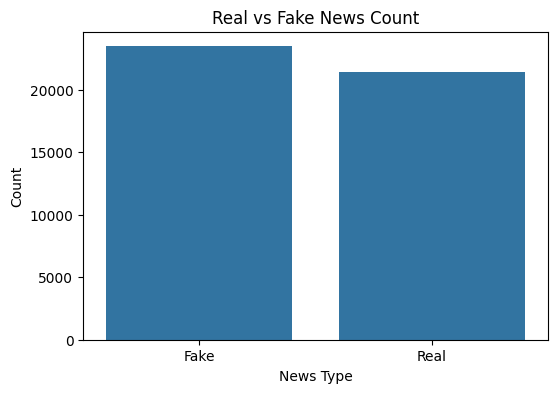

In [13]:
df["text"] = df["text"].apply(wordopt)
df.head(100)
#class distribution of fake vs real news
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Real vs Fake News Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

In [14]:
X = df["text"]
Y = df["target"]
X.shape

(44898,)

In [15]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.25)
X_train.shape

(33673,)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
#print(X_train)
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
#print(analyze(X_train[0]))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
print(xv_train.shape)
print(xv_test.shape)

(33673, 194255)
(11225, 194255)


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(xv_train,Y_train)
print("The Accuracy of the Logistic Regression Model is {}".format(lr.score(xv_test,y_test)))

The Accuracy of the Logistic Regression Model is 0.985924276169265


In [18]:
print(classification_report(y_test,lr.predict(xv_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5806
           1       0.98      0.99      0.99      5419

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(dtc.score(xv_test,y_test)))
print(classification_report(y_test,dtc.predict(xv_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9505567928730512
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5806
           1       0.95      0.94      0.95      5419

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gclf = GradientBoostingClassifier()
gclf.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(gclf.score(xv_test,y_test)))
print(classification_report(y_test,gclf.predict(xv_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(xv_train,Y_train)
print("The Accuracy of the Random Forest Classifier Model is {}".format(rclf.score(xv_test,y_test)))
print(classification_report(y_test,rclf.predict(xv_test)))

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)
    pred_GBC = gclf.predict(new_xv_test)
    pred_RFC = rclf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
test_cases = [
    "Government launches new healthcare initiative.",
    "Scientists claim to have found life on Mars!",
    "This article is a hoax to trick you."
]

for article in test_cases:
    manual_testing(article)


In [ ]:
#Web Scraping From Articles Online
import requests
from bs4 import BeautifulSoup

def scrape_reuters():
    url = "https://www.reuters.com"
    headlines = []
    try:
        res = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(res.content, 'html.parser')
        for tag in soup.find_all(['h1', 'h2', 'h3']):
            text = tag.get_text(strip=True)
            if len(text) > 40 and len(text.split()) > 5:
                headlines.append(text)
    except Exception as e:
        print(f"[Reuters] Error: {e}")
    return headlines[:5]

def scrape_cnn():
    url = "https://www.cnn.com"
    headlines = []
    try:
        res = requests.get(url)
        soup = BeautifulSoup(res.content, "html.parser")
        for tag in soup.find_all(['h2', 'span']):
            text = tag.get_text(strip=True)
            if len(text) > 40 and len(text.split()) > 5:
                headlines.append(text)
    except Exception as e:
        print(f"[CNN] Error: {e}")
    return headlines[:5]

def scrape_bbc():
    url = "https://www.bbc.com"
    headlines = []
    try:
        res = requests.get(url)
        soup = BeautifulSoup(res.content, "html.parser")
        for tag in soup.find_all(['h3', 'h2']):
            text = tag.get_text(strip=True)
            if len(text) > 40 and len(text.split()) > 5:
                headlines.append(text)
    except Exception as e:
        print(f"[BBC] Error: {e}")
    return headlines[:5]
def test_scraped_headlines():
    sources = {
        "Reuters": scrape_reuters(),
        "CNN": scrape_cnn(),
        "BBC": scrape_bbc()
    }

    for source, headlines in sources.items():
        print(f"\n==== {source} Headlines ====")
        for idx, headline in enumerate(headlines, 1):
            print(f"\n{idx}. {headline}")
            manual_testing(headline)
test_scraped_headlines()


In [ ]:
#distribution of text lengths by class (real vs fake)
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='target', bins=50, kde=True)
plt.title('Distribution of Text Lengths by Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.legend(['Fake', 'Real'])
plt.show()

from wordcloud import WordCloud

# Combine all words by class
real_words = ' '.join(df[df['target'] == 1]['text'])
fake_words = ' '.join(df[df['target'] == 0]['text'])

# WordClouds
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(fake_words)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.axis('off')

plt.tight_layout()
plt.show()

#Top N words by frequency
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top_words = get_top_n_words(df['text'], 15)
top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_df)
plt.title('Top 15 Most Frequent Words')
plt.show()